# Question 1

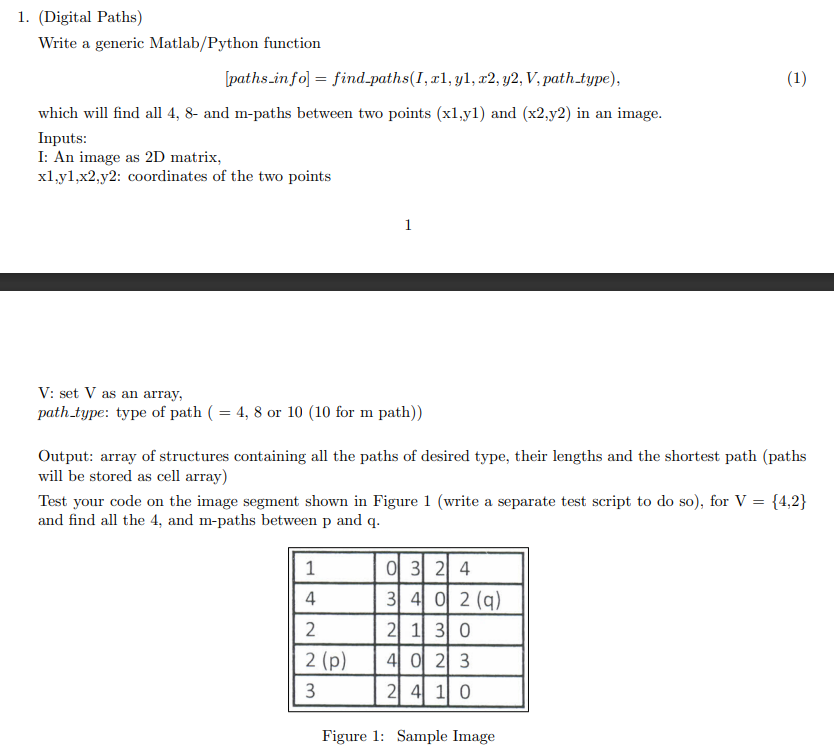

## Porcedure

 Finds all paths of a given type between two points in an image.

    Parameters:
    -----------
    I : np.ndarray
        2D matrix representing the image.
    x1, y1 : int
        Coordinates of the starting point.
    x2, y2 : int
        Coordinates of the ending point.
    V : List[int]
        Set of allowable pixel values for the path.
    path_type : int
        Type of path to find. Can be 4, 8, or 10 for m-path.

    Returns:
    --------
    A tuple (paths_info, shortest_path), where:
    - paths_info is a list of structures containing all the paths of desired type, their lengths, and the shortest path.
      Each structure is a list of (x,y) tuples representing a path in the image.
    - shortest_path is a dictionary with keys 'path' (a list of (x,y) tuples) and 'length' (an int).
      It represents the shortest path of the desired type between the two points.

In [ ]:
import numpy as np
from typing import List, Tuple

def find_paths(I: np.ndarray, x1: int, y1: int, x2: int, y2: int, V: List[int], path_type: int) -> Tuple[List[List[Tuple[int,int]]], List[dict]]:

    # Define the possible moves according to the path type
    if path_type == 4:
        moves = [(0,1), (1,0), (0,-1), (-1,0)]
    elif path_type == 8:
        moves = [(0,1), (1,0), (0,-1), (-1,0), (1,1), (1,-1), (-1,1), (-1,-1)]
    elif path_type == 10:
        moves = [(0,1), (1,0), (0,-1), (-1,0), (1,1), (1,-1), (-1,1), (-1,-1), (2,0), (0,2)]
    else:
        raise ValueError("Invalid path type. Must be 4, 8, or 10.")
    
    # Define a function to check if a given move is valid (i.e., leads to a pixel with an allowable value)
    def is_valid_move(x, y, dx, dy):
        if x+dx < 0 or x+dx >= I.shape[0] or y+dy < 0 or y+dy >= I.shape[1]:
            return False
        pixel_value = I[x+dx, y+dy]
        return pixel_value in V
    graph=[]
    # Define a recursive function to find all paths
    def find_all_paths(x, y, path, path_length, paths):
        path.append((x,y))
        if x == x2 and y == y2:
            paths.append((path.copy(), path_length))
        else:
            for dx, dy in moves:
                if is_valid_move(x, y, dx, dy) and (x+dx, y+dy) not in path:
                    find_all_paths(x+dx, y+dy, path, path_length+1, paths)
        path.pop()
    
    # Find all paths of the desired type
    paths = []
    for dx, dy in moves:
        if is_valid_move(x1, y1, dx, dy):
            find_all_paths(x1+dx, y1+dy, [(x1,y1)], 1, paths)
    # Filter paths by type and compute their lengths
    paths_info = []
    for path, path_length in paths:
        if len(path) - 1 == path_length:
            if len(path) == 2:
                path_type_found = 4
            else:
                path_type_found = 8
                for i in range(2, len(path)):
                    dx = path[i][0] - path[i-2][0]
                    dy = path[i][1] - path[i-2][1]
                    if (dx,dy) not in moves:
                        path_type_found = 10
                        break
            paths_info.append({'path': path, 'length': path_length, 'type': path_type_found})
            
    # Find the shortest path of the desired type
    shortest_path = None
    for path_info in paths_info:
        if shortest_path is None or path_info['length'] < shortest_path['length']:
            shortest_path = path_info

    return paths_info, shortest_path



## 4-paths


In [ ]:

# Define the image as a numpy array
I = np.array([[1,0,3,2,4],[4,3,4,0,2],[2,2,1,3,0],[2,4,0,2,3],[3,2,4,1,0]])

# Find all 4- 8- and 10-paths between p and q
paths_info, shortest_path = find_paths(I, 3, 0, 1, 4, [4,2], 4)

# Print the results
# print(f"Found {len(paths_info)} paths:")
graph=[]
for path_info in paths_info:
    print(f"- Type {path_info['type']}, length {path_info['length']}: {path_info['path']}")
    graph.append(path_info['path'])
if shortest_path is not None:
    print(f"Shortest path: type {shortest_path['type']}, length {shortest_path['length']}: {shortest_path['path']}")
else:
    print("No path found.")


No path found.


As we can see that there is no 4-path found using V[4,2]

### plot all possible 4-paths and distances

Distances is calculte using euclidean formula

$d(p,q) = \sqrt{(q_{1}-p_{1})^{2} + (q_{2}-p_{2})^{2}}$




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path(coords):
    x_coords = [coord[0] for coord in coords]
    y_coords = [coord[1] for coord in coords]

    fig, ax = plt.subplots(figsize=(5, 5))

    # Set the background color to grey
    ax.set_facecolor('#f2f2f2')

    # Create a scatter plot of the coordinates
    ax.scatter(x_coords, y_coords, color='blue', label='Points')

    # Plot the path using a custom color and label
    ax.plot(x_coords, y_coords, color='red', label='Path')

    # Calculate the distance of the path
    dist = 0
    for i in range(len(coords)-1):
        dist += np.sqrt((coords[i+1][0]-coords[i][0])**2 + (coords[i+1][1]-coords[i][1])**2)

    # Add the distance to the title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Path (Distance = {dist:.2f})')
    ax.legend()

    plt.imshow(I, cmap='gray')



for i, coords in enumerate(graph):
    plot_path(coords)


No 4-paths found

## Eight Paths

In [ ]:

# Define the image as a numpy array
I = np.array([[1,0,3,2,4],[4,3,4,0,2],[2,2,1,3,0],[2,4,0,2,3],[3,2,4,1,0]])

# Find all 4- 8- and 10-paths between p and q
paths_info, shortest_path = find_paths(I, 3, 0, 1, 4, [4,2], 8)

# Print the results
# print(f"Found {len(paths_info)} paths:")
graph=[]
for path_info in paths_info:
    print(f"-  length {path_info['length']}: {path_info['path']}")
    graph.append(path_info['path'])
if shortest_path is not None:
    print(f"Shortest path: length {shortest_path['length']}: {shortest_path['path']}")
else:
    print("No path found.")


-  length 6: [(3, 0), (3, 1), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 5: [(3, 0), (3, 1), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 6: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 8: [(3, 0), (3, 1), (2, 0), (1, 0), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 0), (1, 0), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 6: [(3, 0), (2, 0), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 5: [(3, 0), (2, 0), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 7: [(3, 0), (2, 0), (1, 0), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 6: [(3, 0), (2, 0), (1, 0), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 7: [(3, 0), (2, 0), (3, 1), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 6: [(3, 0), (2, 0), (3, 1), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 8: [(3, 0), (4, 1), (4, 2), (3, 1), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 7: [(3, 0), (4, 1), (4, 2), (3, 

Shortest path: length 4: [(3, 0), (2, 1), (1, 2), (0, 3), (1, 4)]

### Plot All possible 8-paths and Calculate distance of each paths

<ipython-input-38-0dde401975c6>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


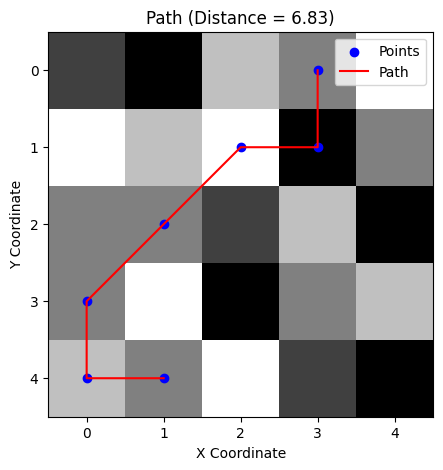

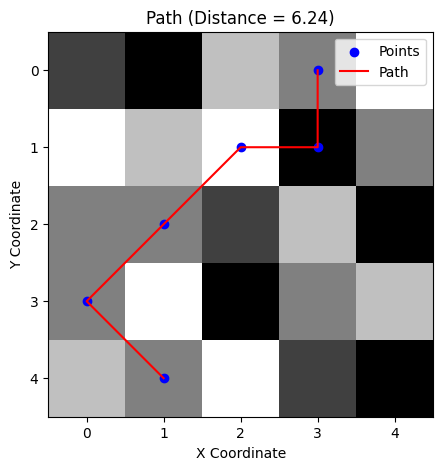

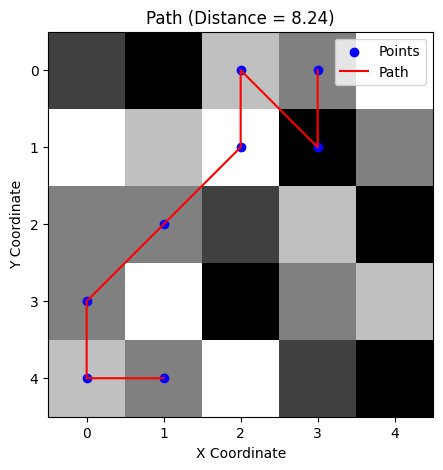

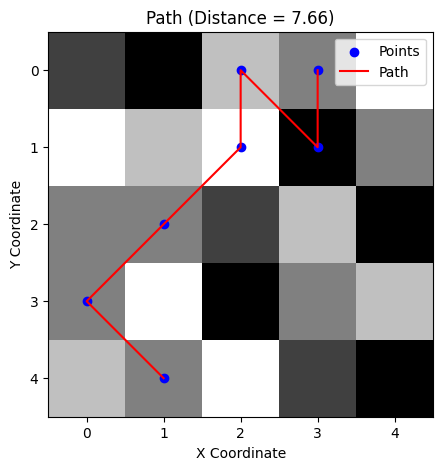

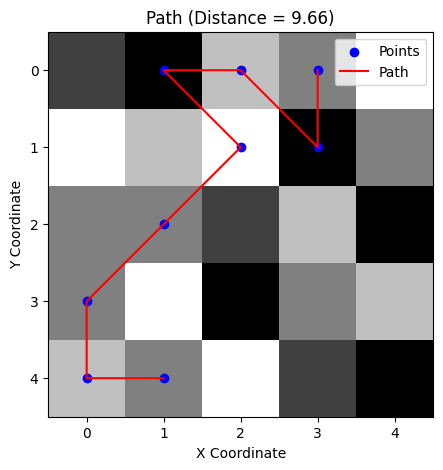

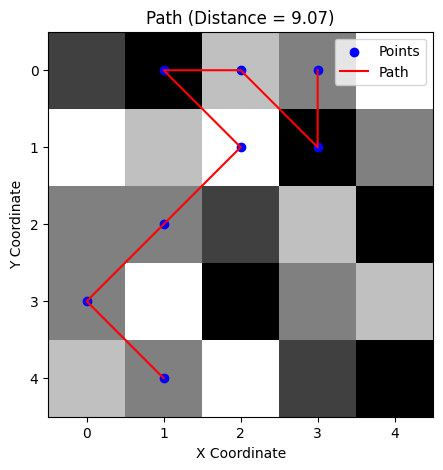

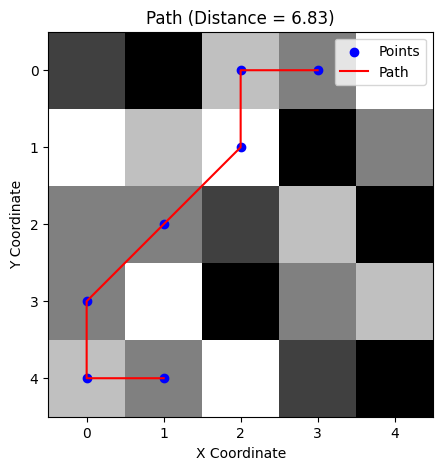

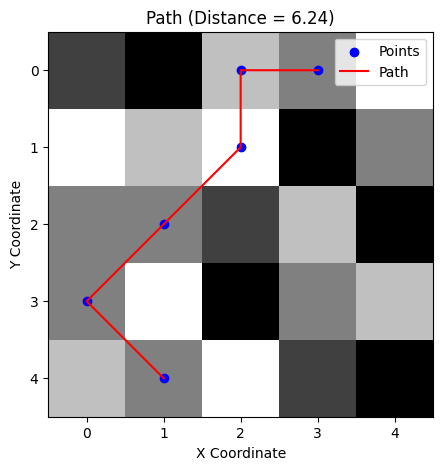

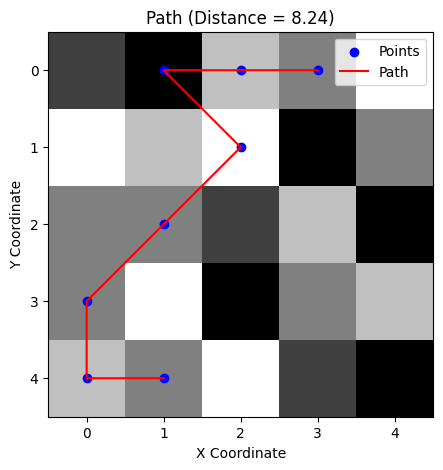

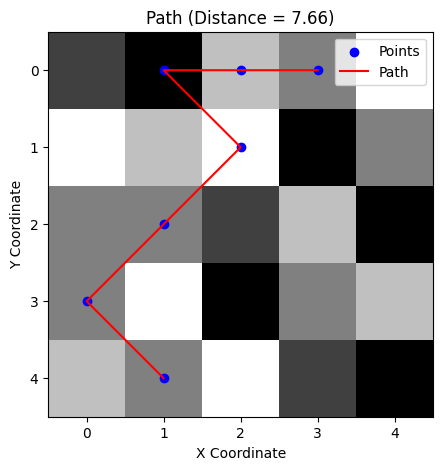

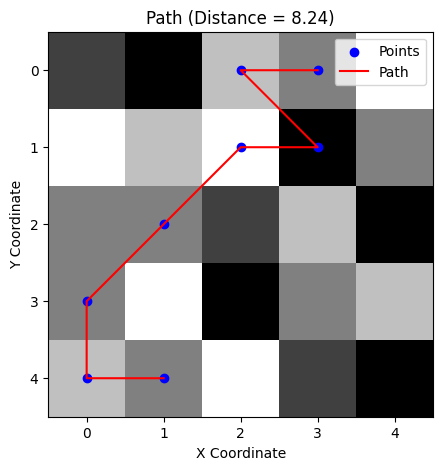

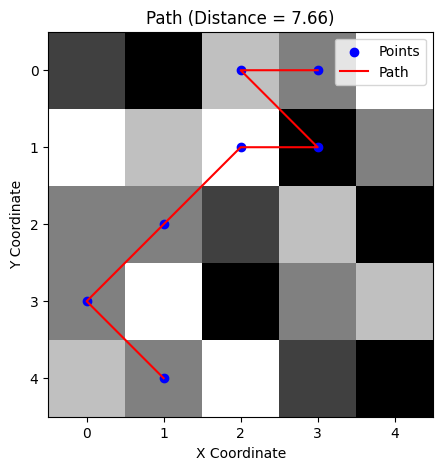

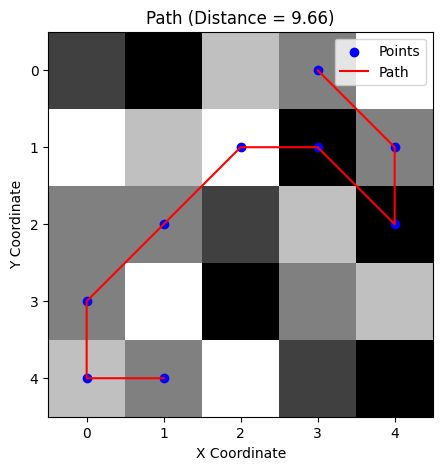

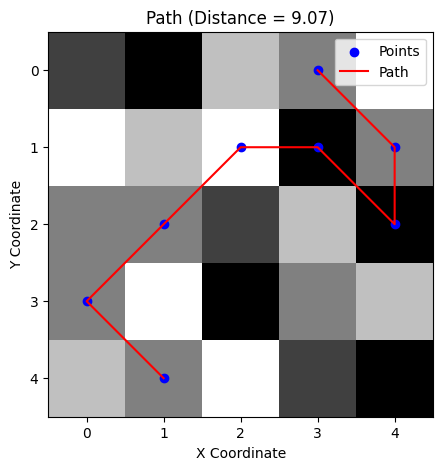

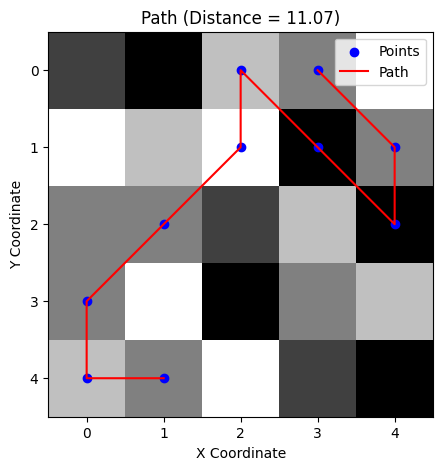

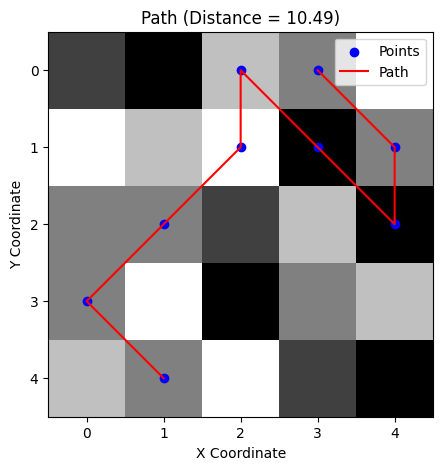

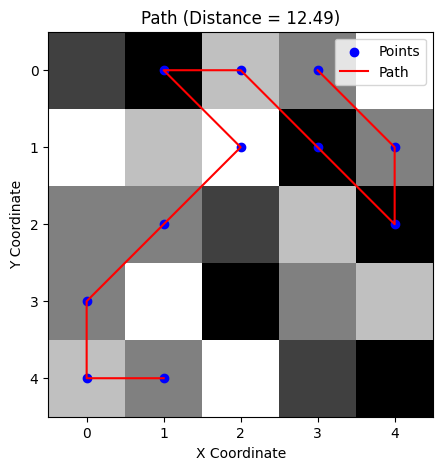

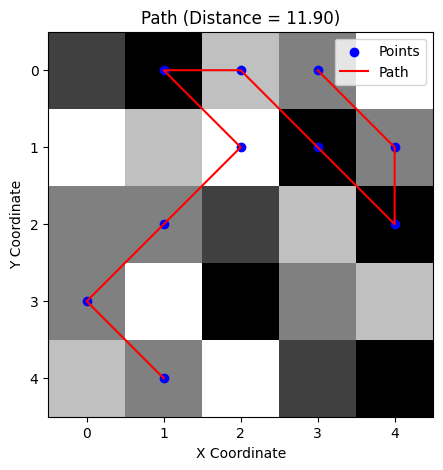

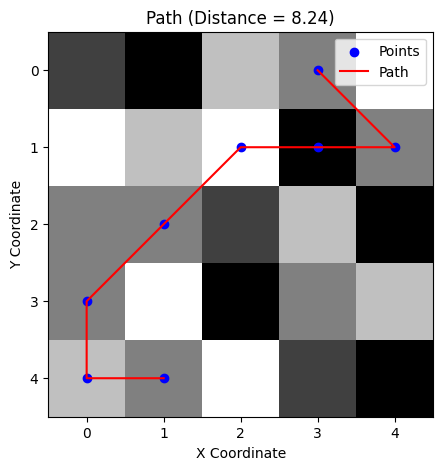

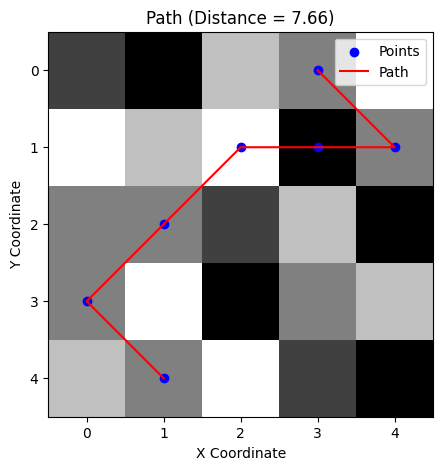

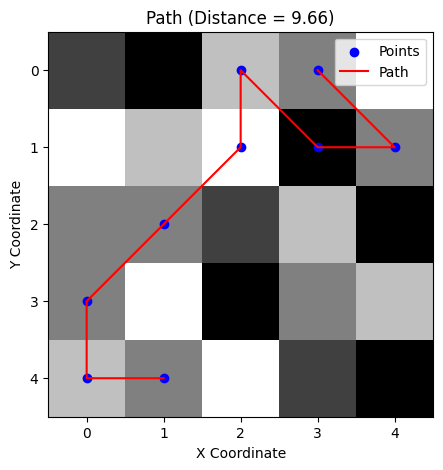

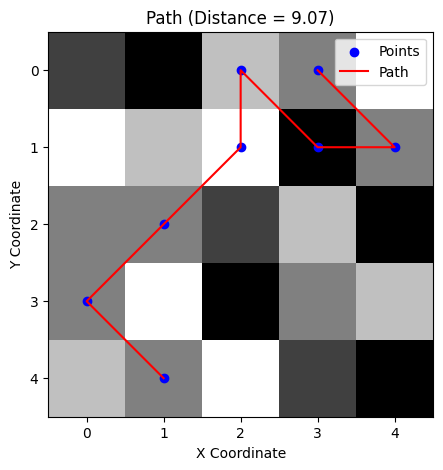

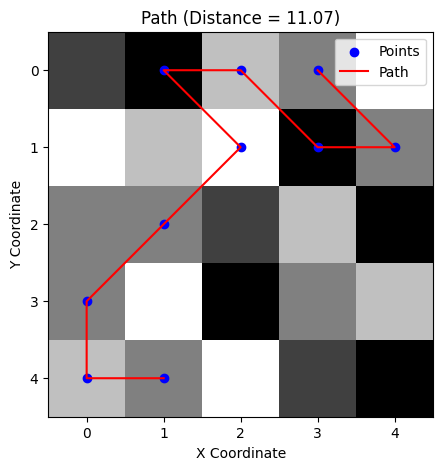

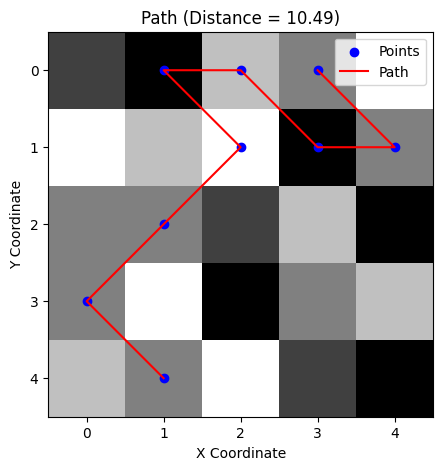

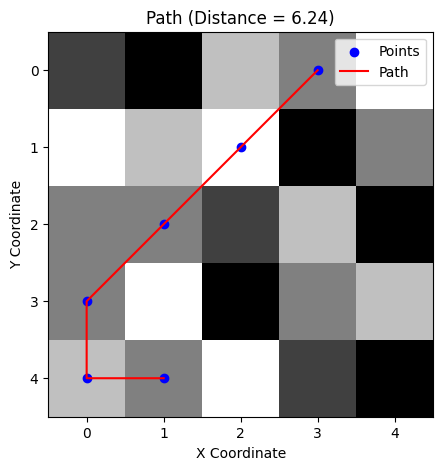

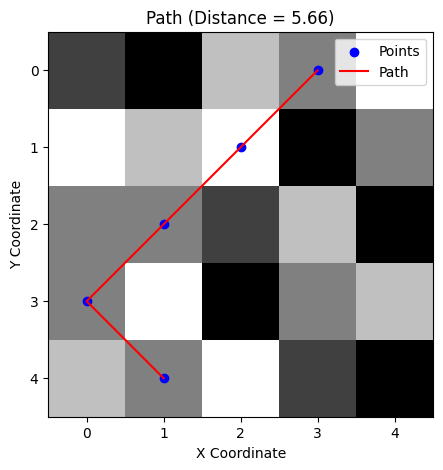

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path(coords):
    x_coords = [coord[0] for coord in coords]
    y_coords = [coord[1] for coord in coords]

    fig, ax = plt.subplots(figsize=(5, 5))

    # Set the background color to grey
    ax.set_facecolor('#f2f2f2')

    # Create a scatter plot of the coordinates
    ax.scatter(x_coords, y_coords, color='blue', label='Points')

    # Plot the path using a custom color and label
    ax.plot(x_coords, y_coords, color='red', label='Path')

    # Calculate the distance of the path
    dist = 0
    for i in range(len(coords)-1):
        dist += np.sqrt((coords[i+1][0]-coords[i][0])**2 + (coords[i+1][1]-coords[i][1])**2)

    # Add the distance to the title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Path (Distance = {dist:.2f})')
    ax.legend()

    plt.imshow(I, cmap='gray')



for i, coords in enumerate(graph):
    plot_path(coords)


To plot the shortest  8-path




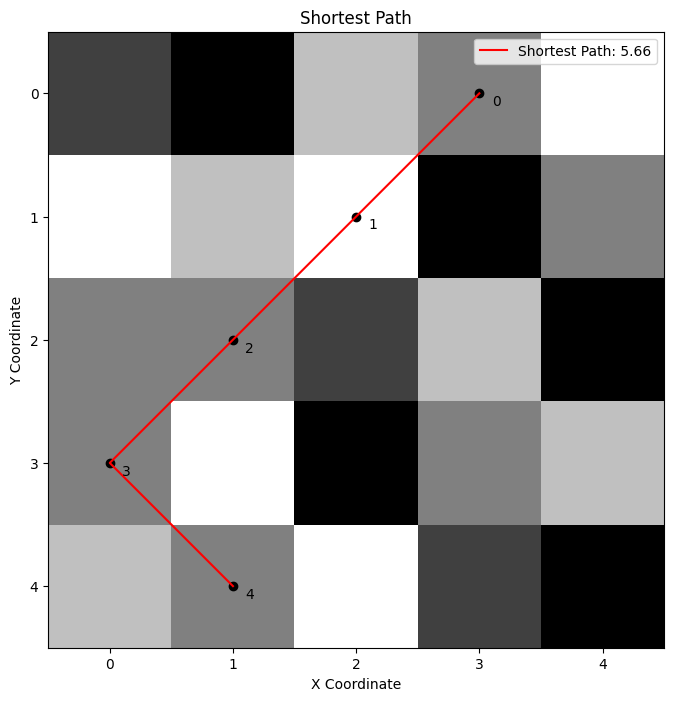

In [ ]:
import math
import matplotlib.pyplot as plt

# Define a function to calculate the distance of a path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path)-1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        total_distance += distance
    return total_distance

# Find the shortest path
shortest_path = None
shortest_distance = float('inf')
for path in graph:
    distance = calculate_distance(path)
    if distance < shortest_distance:
        shortest_path = path
        shortest_distance = distance

# Plot the shortest path
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_facecolor('lightgrey')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Shortest Path')

# Plot the points
for i, point in enumerate(shortest_path):
    x, y = point
    ax.scatter(x, y, color='black')
    ax.annotate(f'{i}', (x+0.1, y+0.1))

# Plot the path
x_coords = [point[0] for point in shortest_path]
y_coords = [point[1] for point in shortest_path]
ax.plot(x_coords, y_coords, color='red', label=f'Shortest Path: {shortest_distance:.2f}')
ax.legend()

plt.imshow(I, cmap='gray')


Shortest path is shown below with distance 5.66

## m-paths

In [ ]:

# Define the image as a numpy array
I = np.array([[1,0,3,2,4],[4,3,4,0,2],[2,2,1,3,0],[2,4,0,2,3],[3,2,4,1,0]])

# Find all 4- 8- and 10-paths between p and q
paths_info, shortest_path = find_paths(I, 3, 0, 1, 4, [4,2], 10)

# Print the results
# print(f"Found {len(paths_info)} paths:")
graph=[]
for path_info in paths_info:
    print(f"-  length {path_info['length']}: {path_info['path']}")
    graph.append(path_info['path'])
if shortest_path is not None:
    print(f"Shortest path: length {shortest_path['length']}: {shortest_path['path']}")
else:
    print("No path found.")


-  length 8: [(3, 0), (3, 1), (2, 1), (2, 0), (1, 0), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 1), (2, 0), (1, 0), (1, 2), (0, 3), (1, 4)]
-  length 6: [(3, 0), (3, 1), (2, 1), (2, 0), (1, 0), (1, 2), (1, 4)]
-  length 6: [(3, 0), (3, 1), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 5: [(3, 0), (3, 1), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 4: [(3, 0), (3, 1), (2, 1), (1, 2), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 1), (1, 0), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 6: [(3, 0), (3, 1), (2, 1), (1, 0), (1, 2), (0, 3), (1, 4)]
-  length 5: [(3, 0), (3, 1), (2, 1), (1, 0), (1, 2), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 6: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 2), (0, 3), (1, 4)]
-  length 5: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 2), (1, 4)]
-  length 8: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 0), (1, 2), (0, 3), (0, 4), (1, 4)]
-  length 7: [(3, 0), (3, 1), (2, 0), (2, 1), (1, 0), (1, 2), (0, 3), (1, 

Shortest path: length 3: [(3, 0), (2, 1), (1, 2), (1, 4)]

### To plot all possible m-paths and calculate distance

<ipython-input-42-0dde401975c6>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


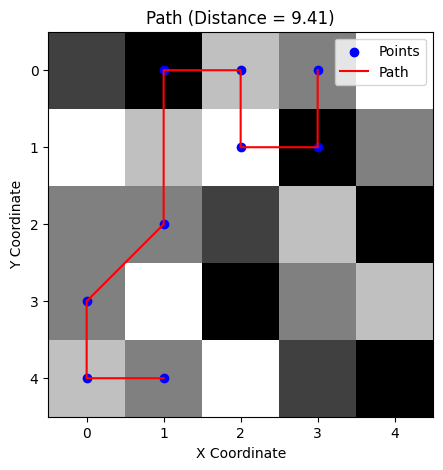

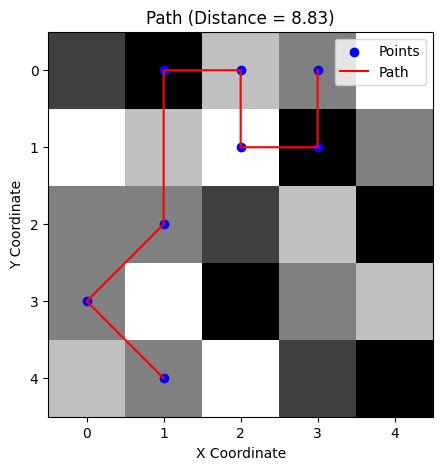

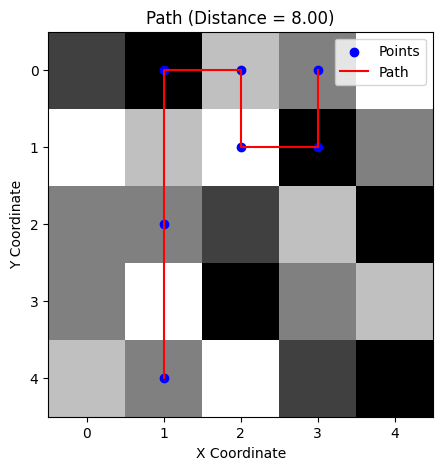

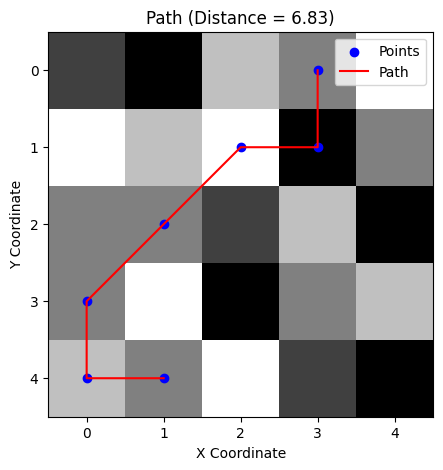

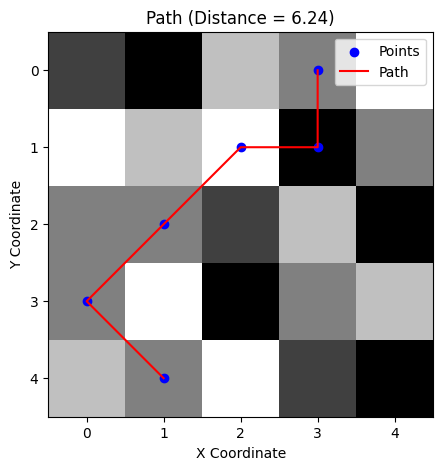

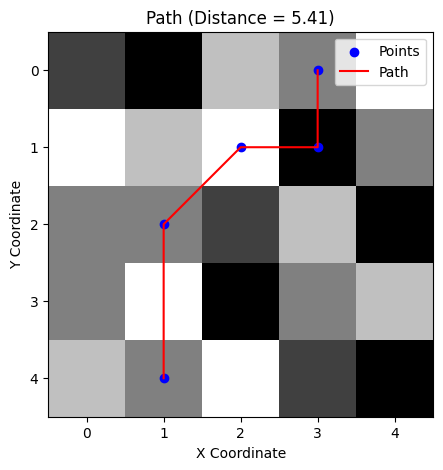

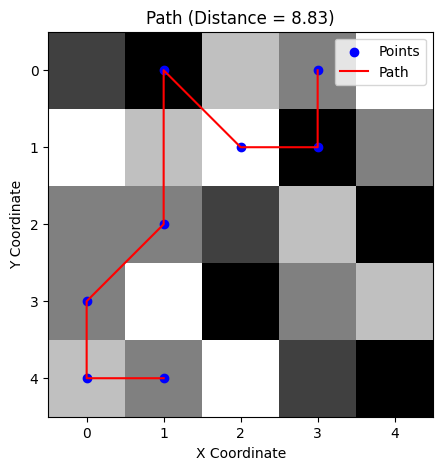

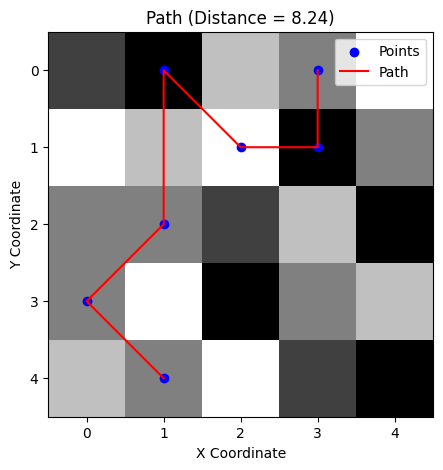

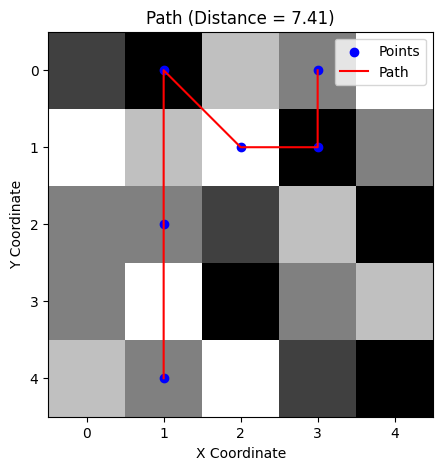

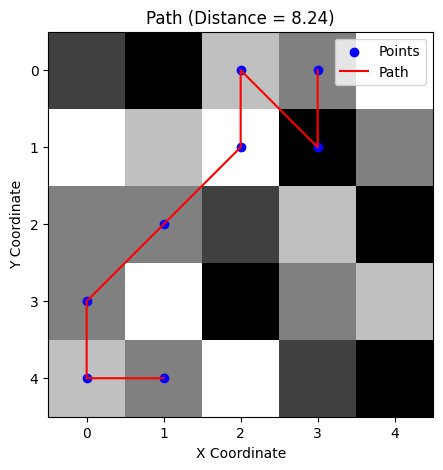

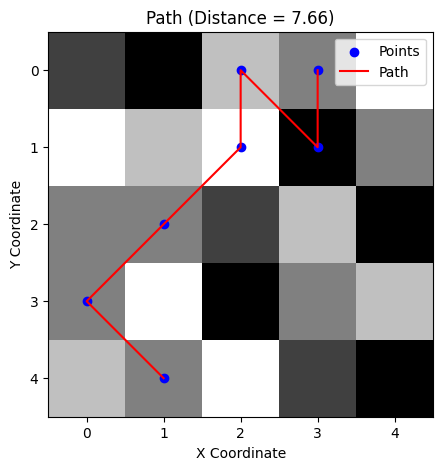

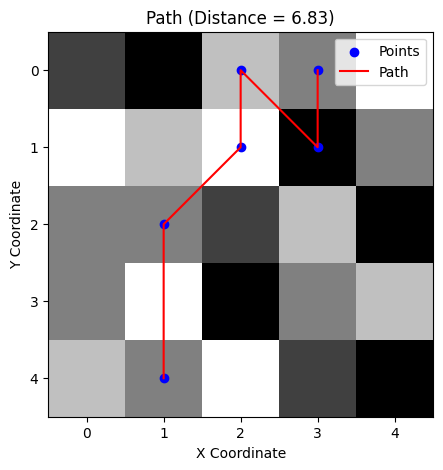

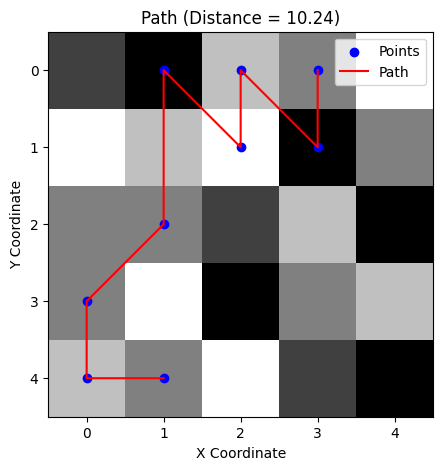

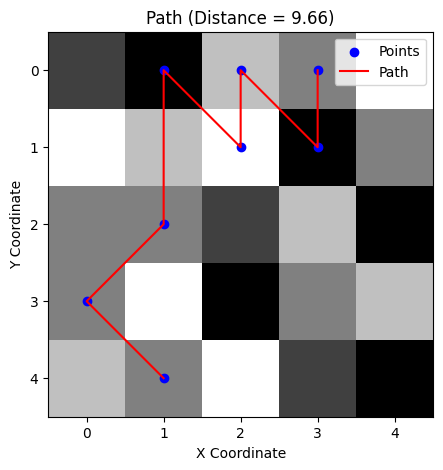

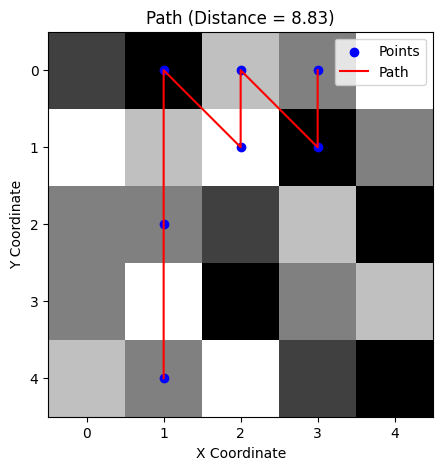

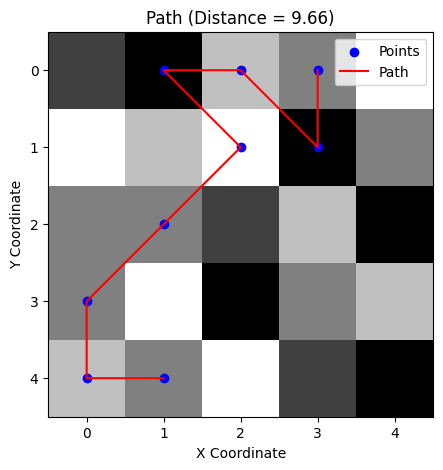

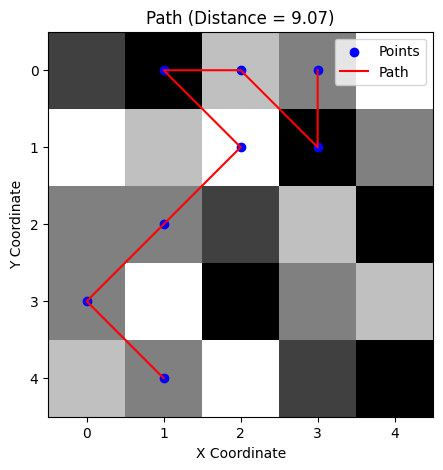

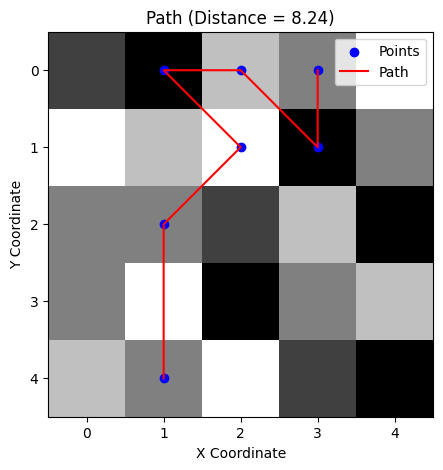

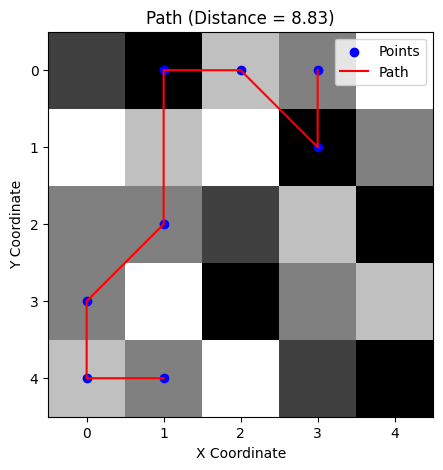

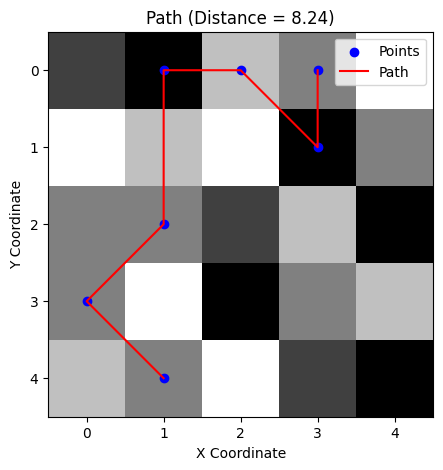

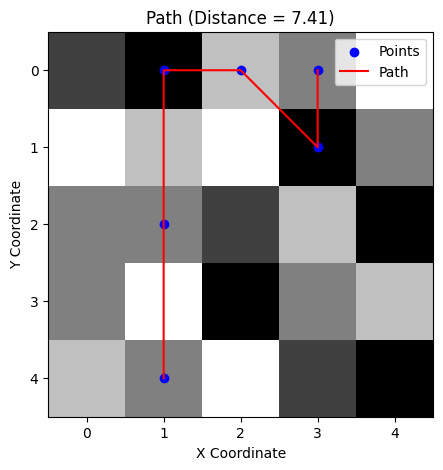

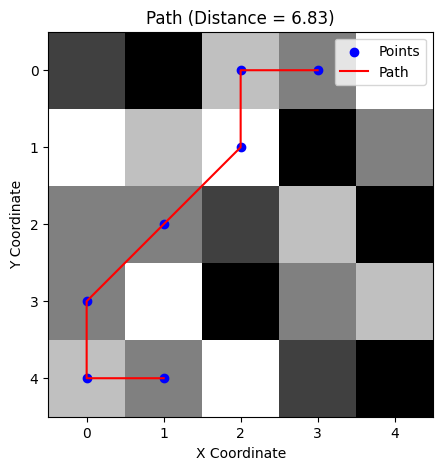

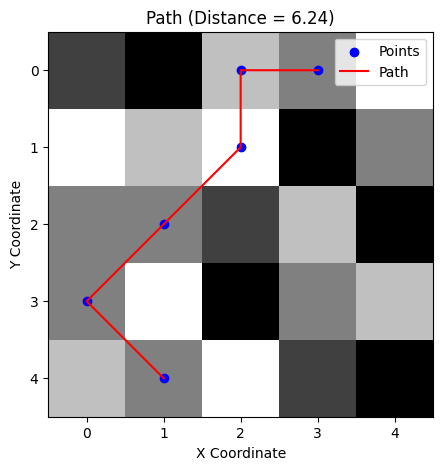

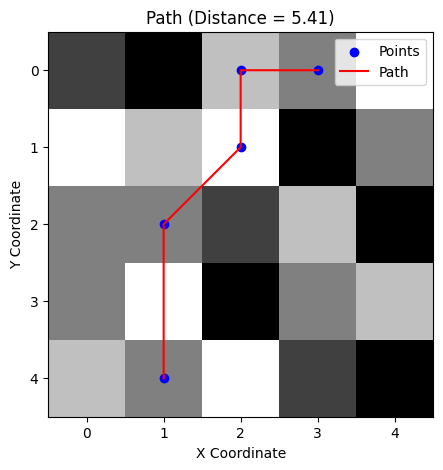

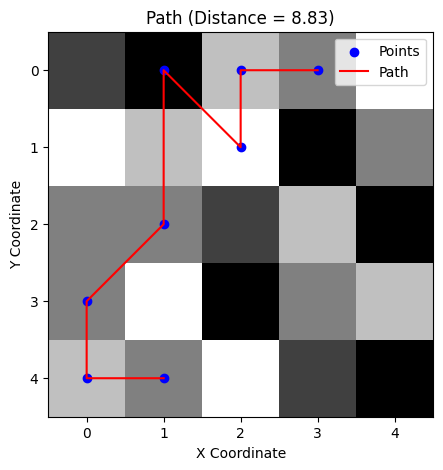

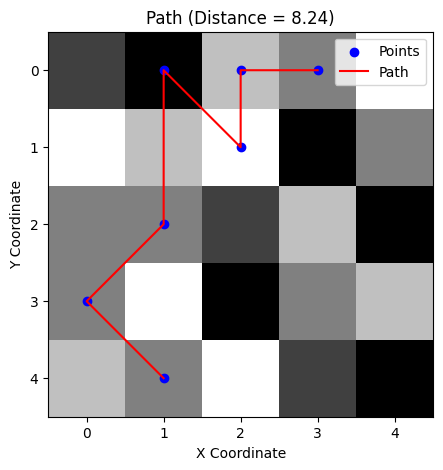

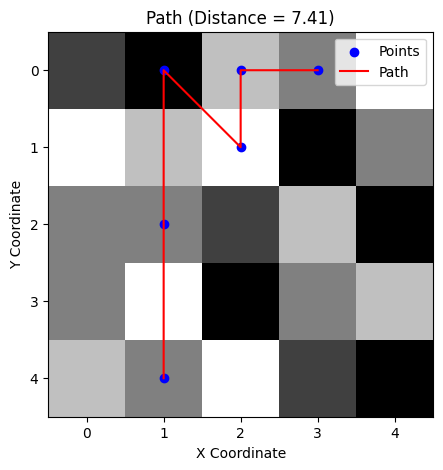

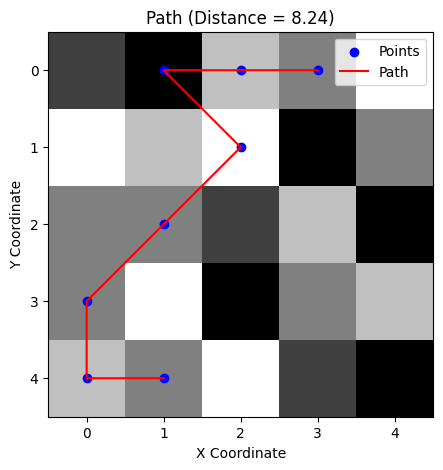

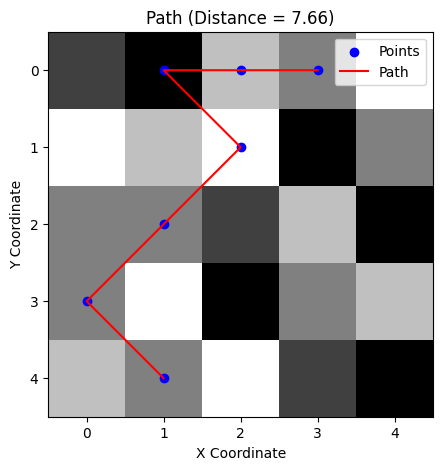

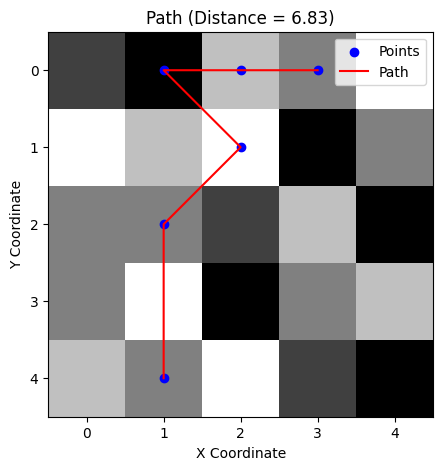

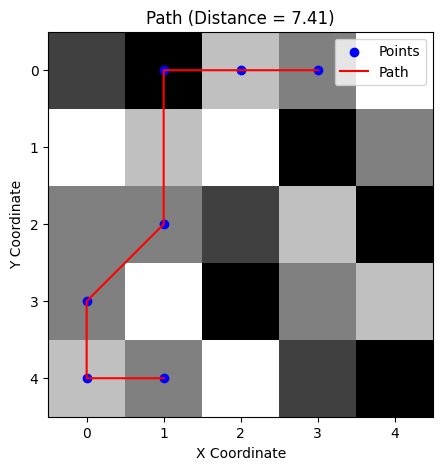

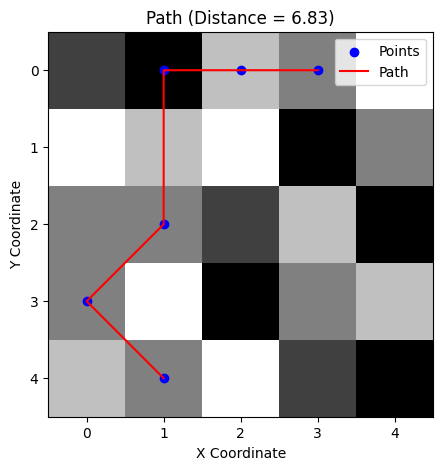

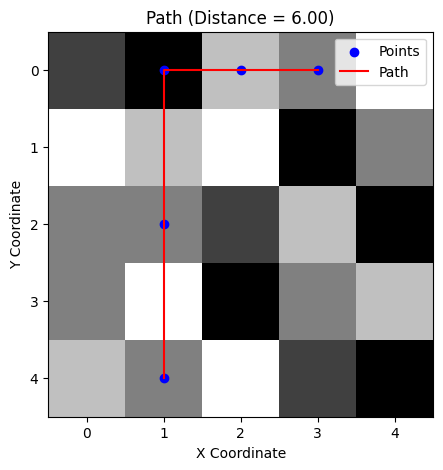

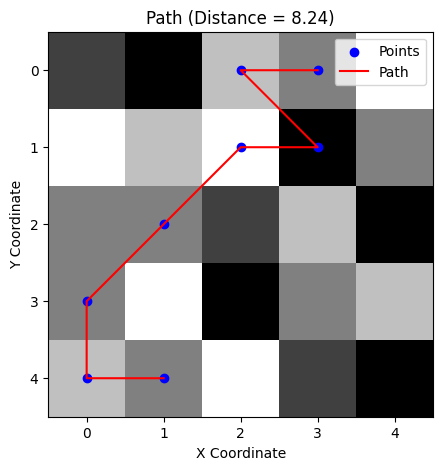

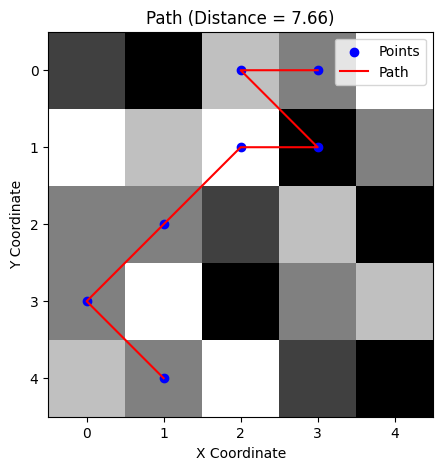

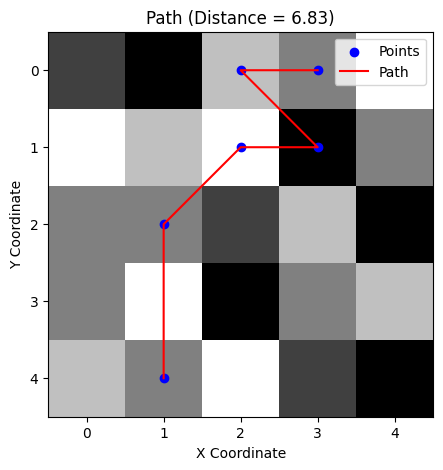

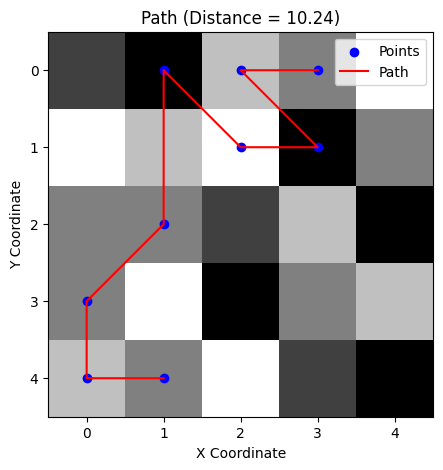

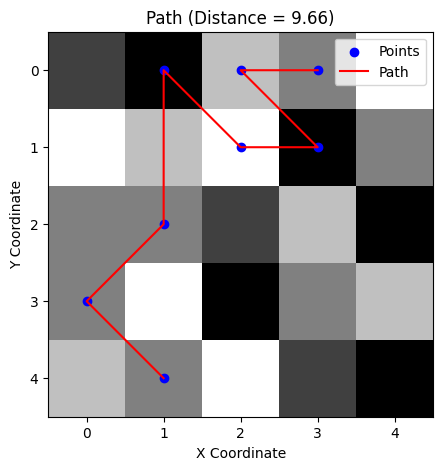

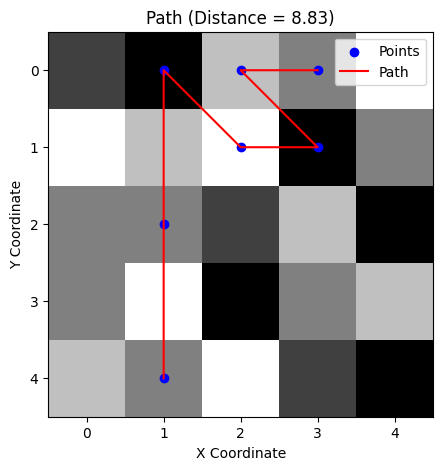

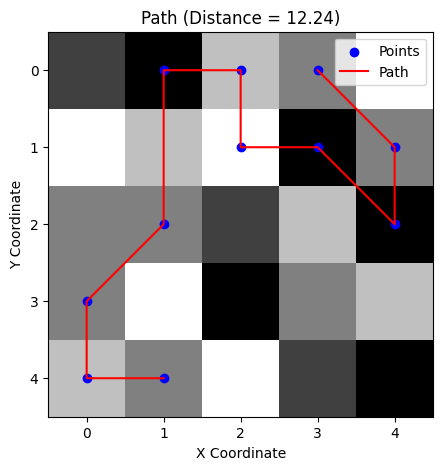

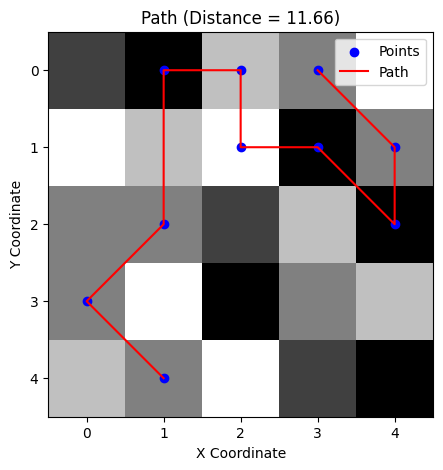

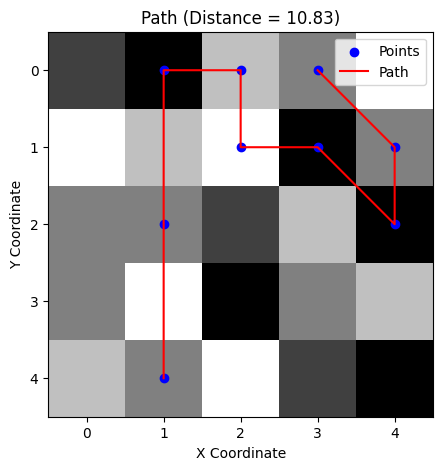

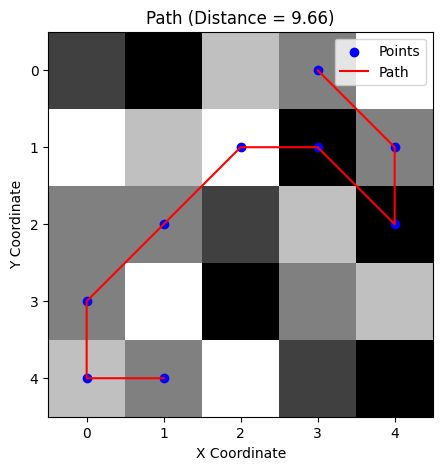

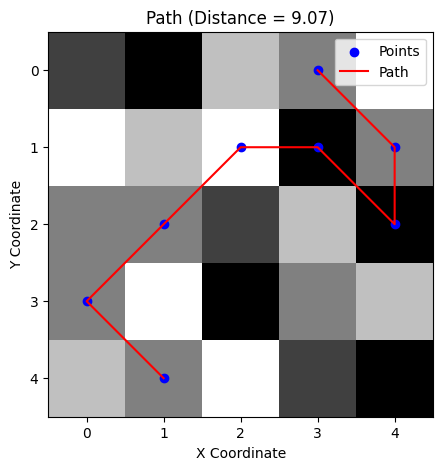

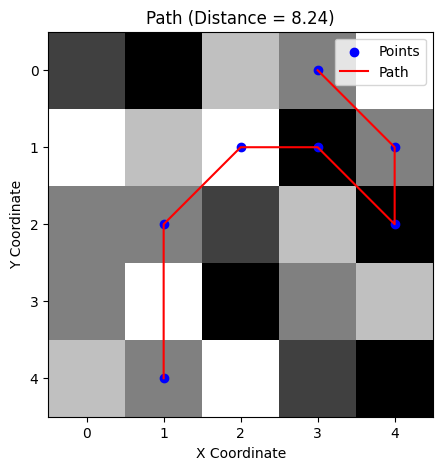

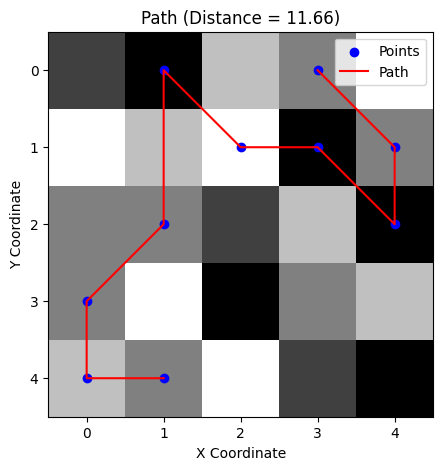

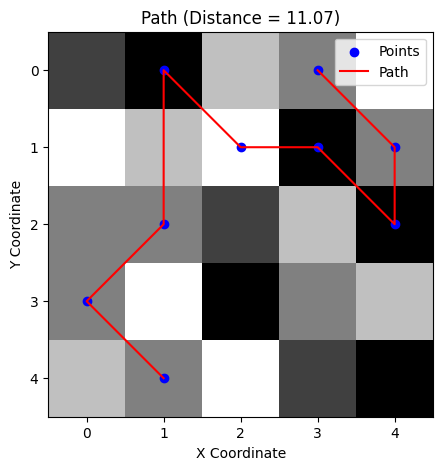

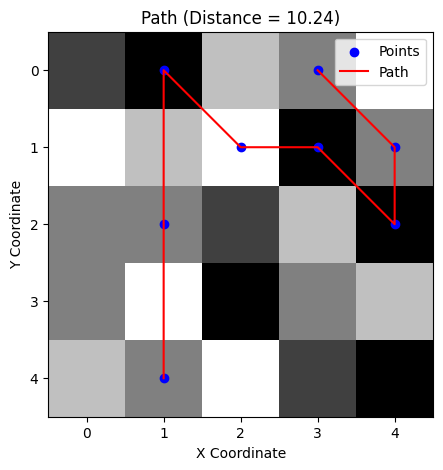

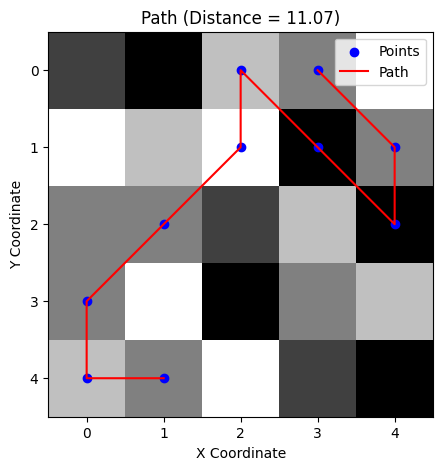

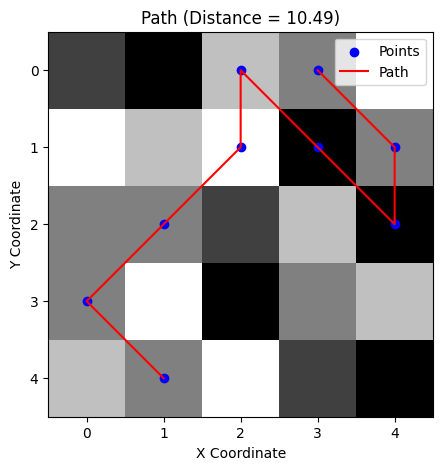

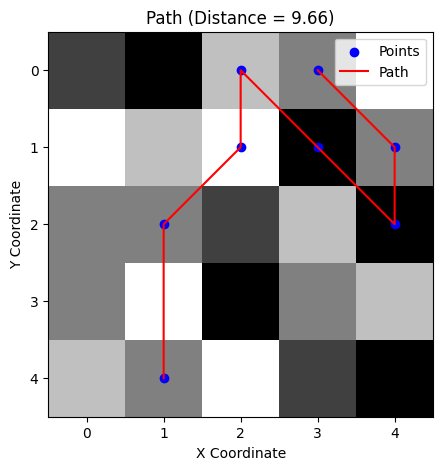

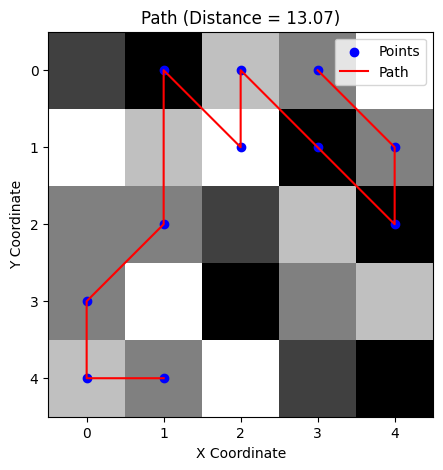

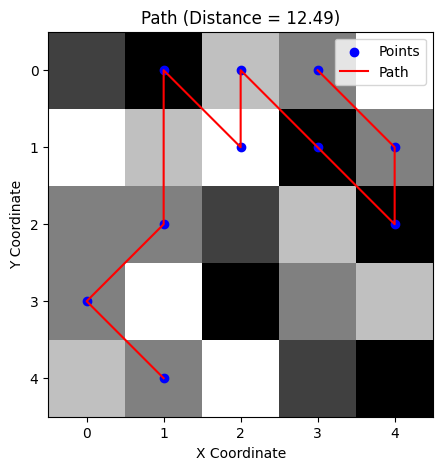

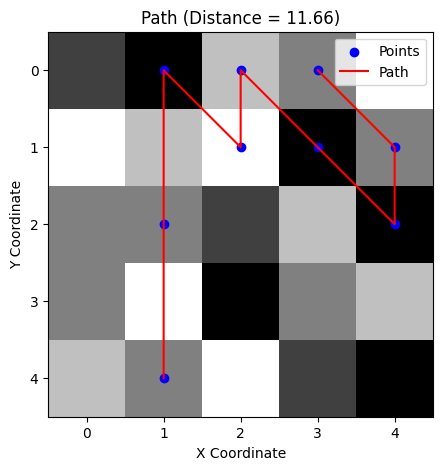

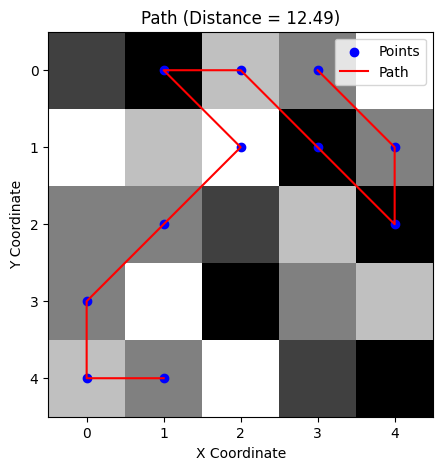

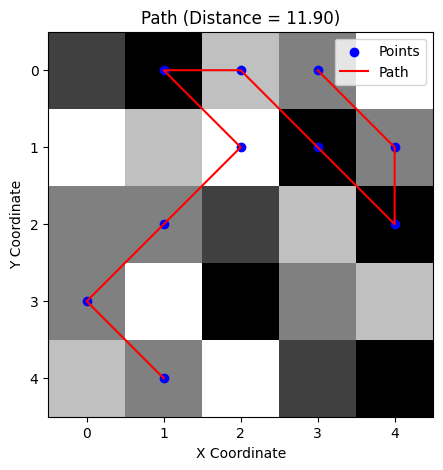

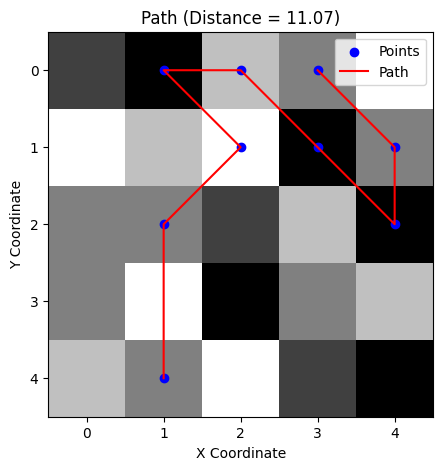

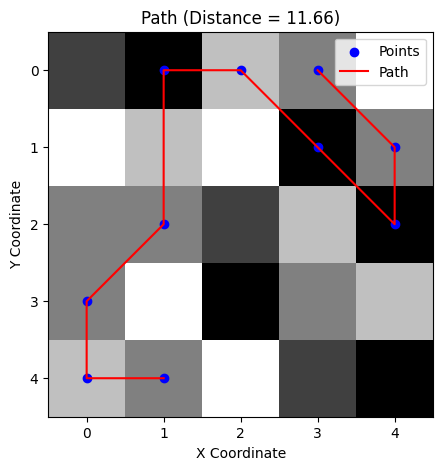

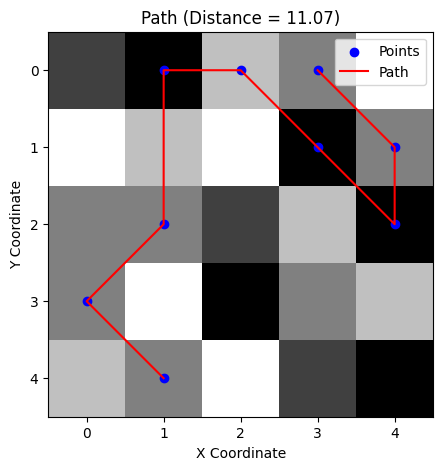

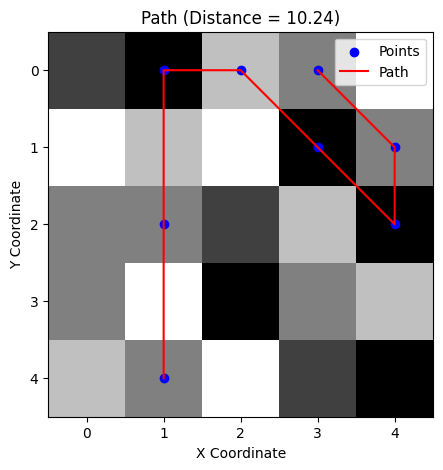

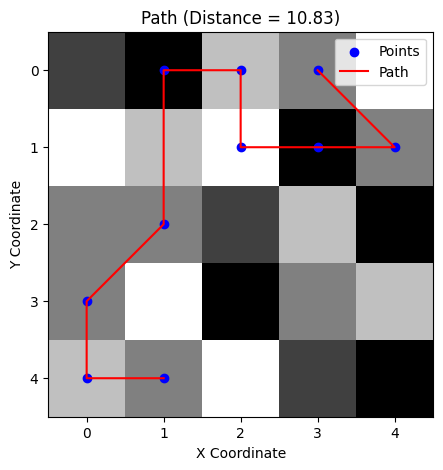

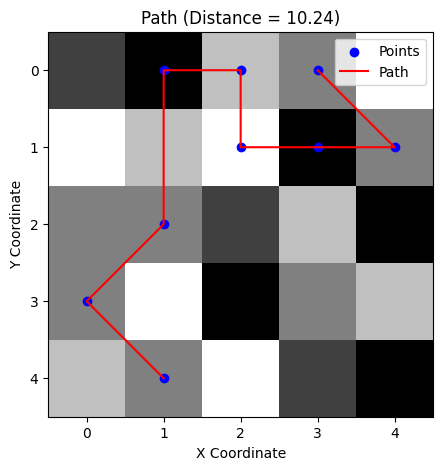

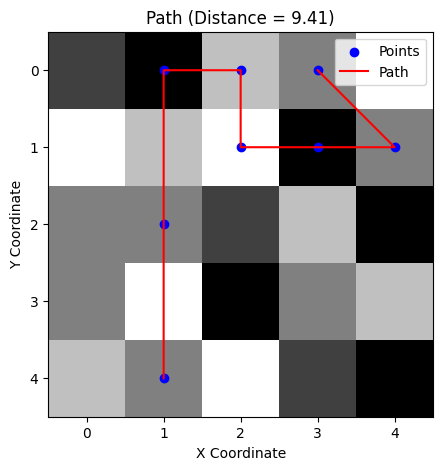

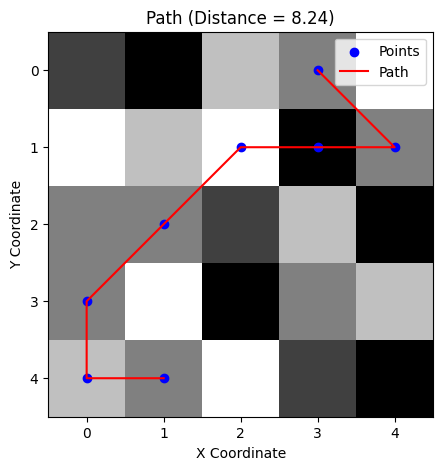

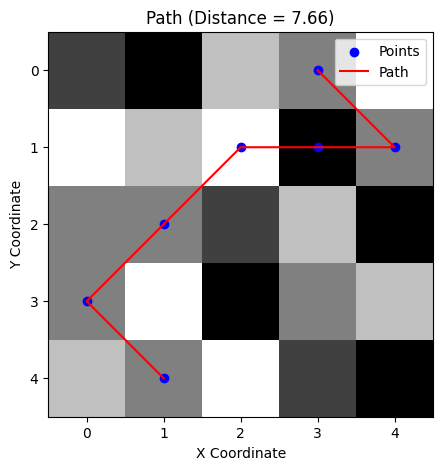

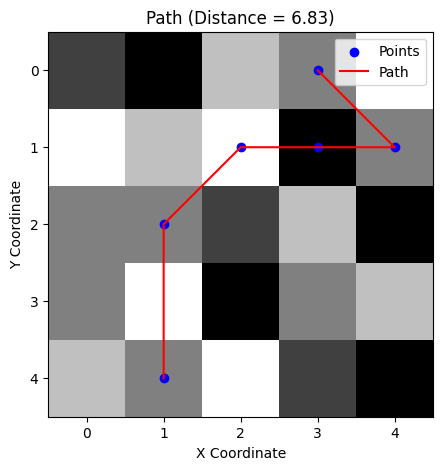

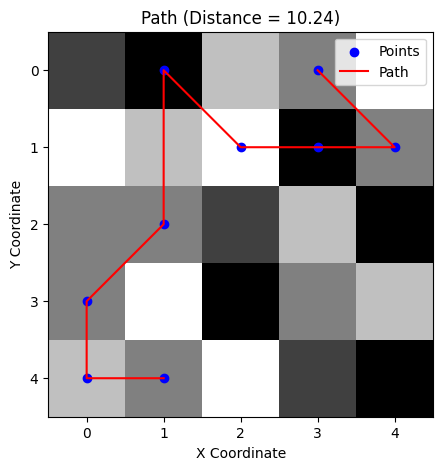

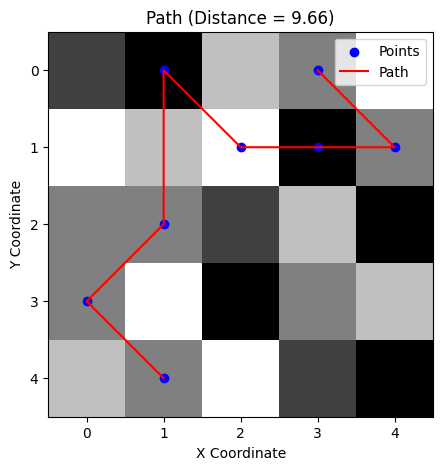

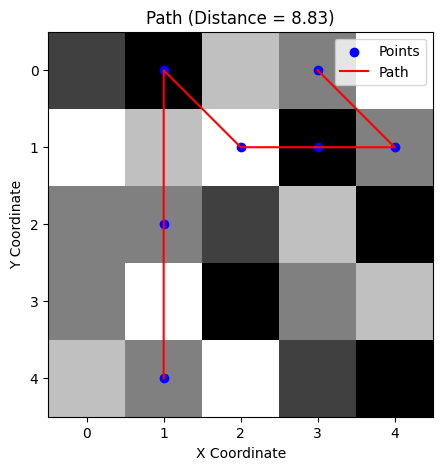

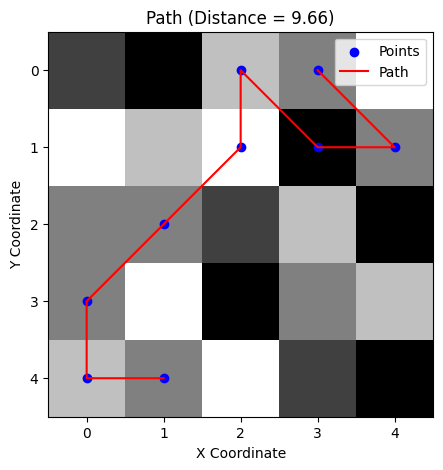

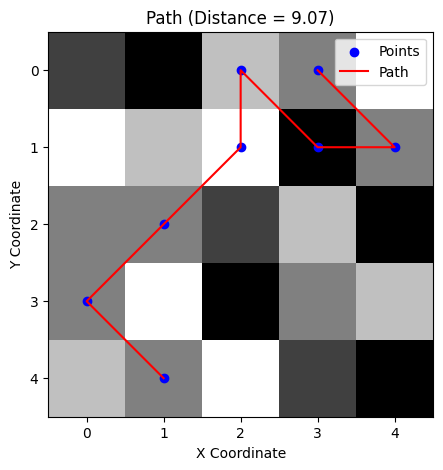

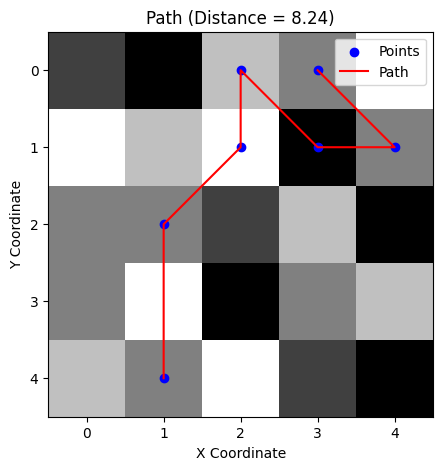

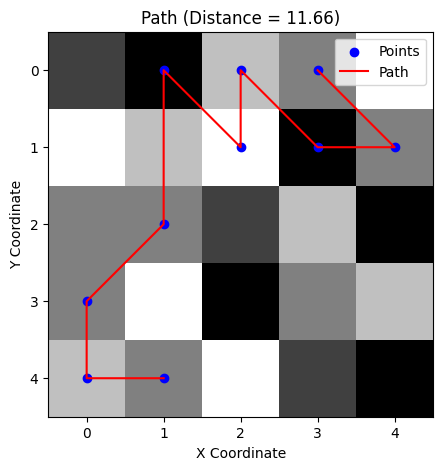

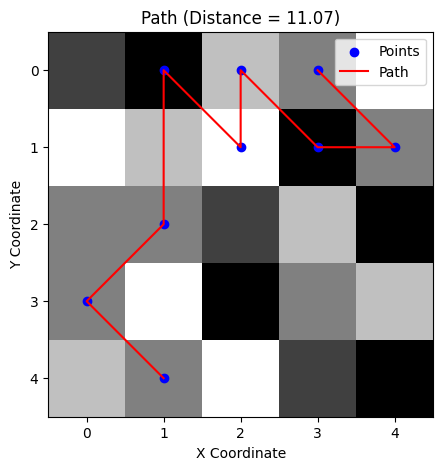

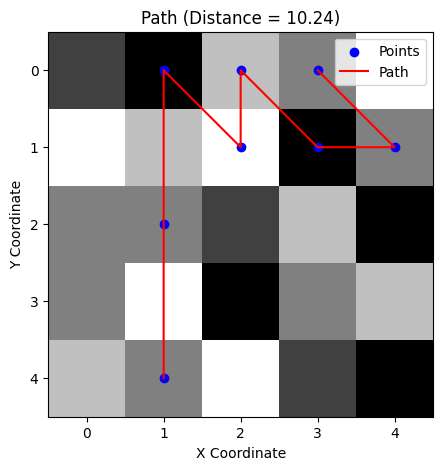

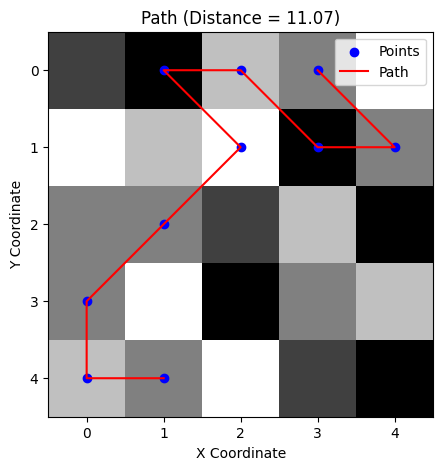

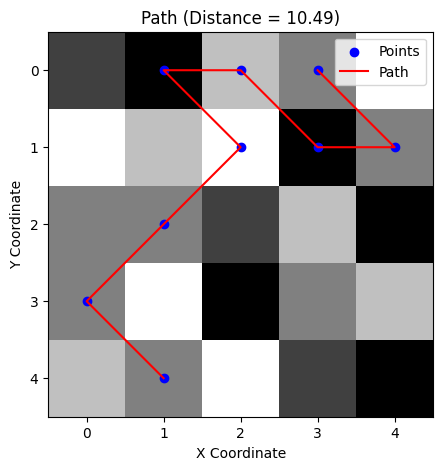

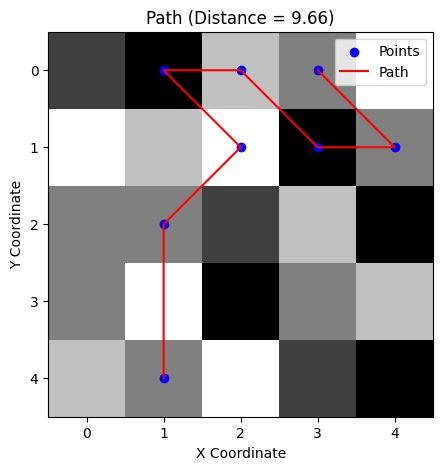

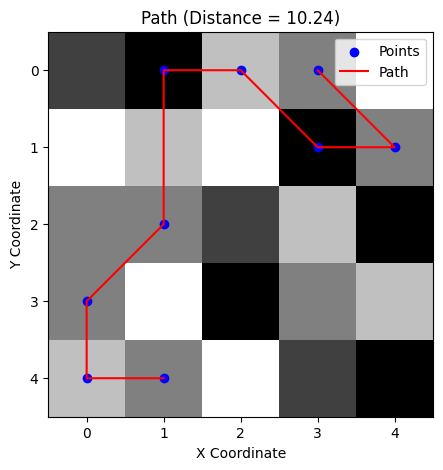

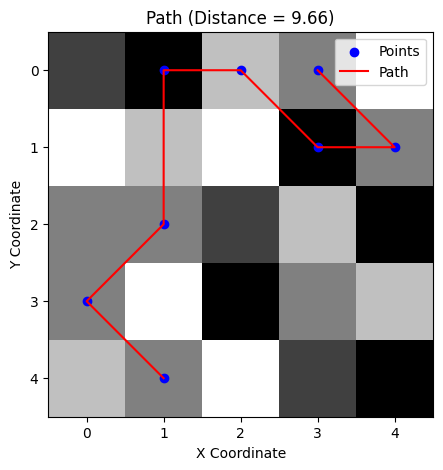

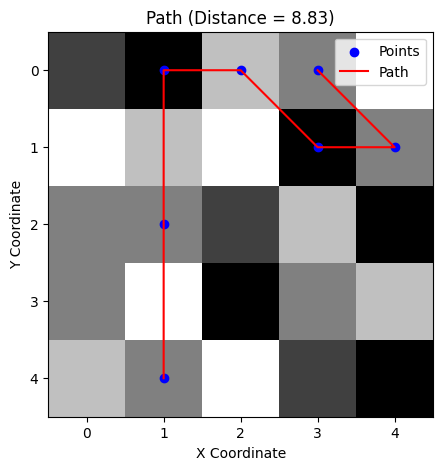

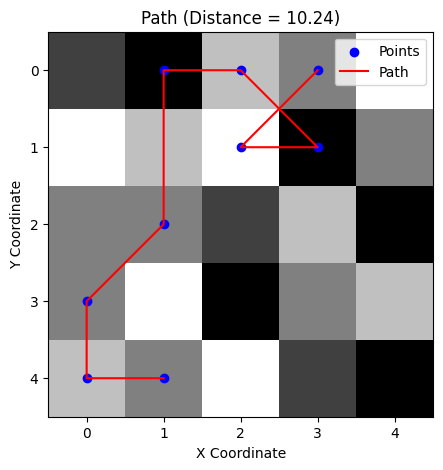

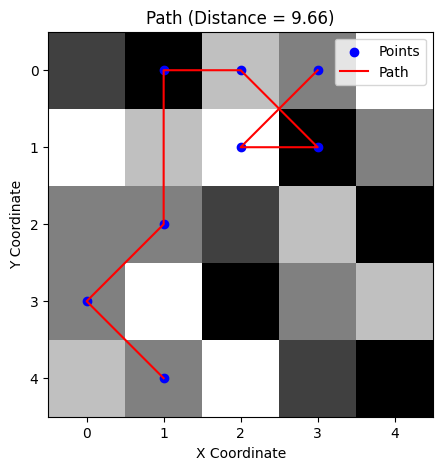

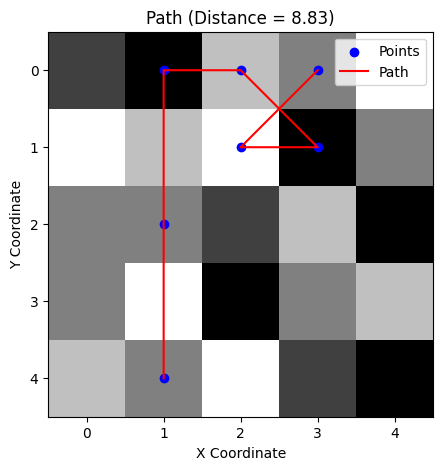

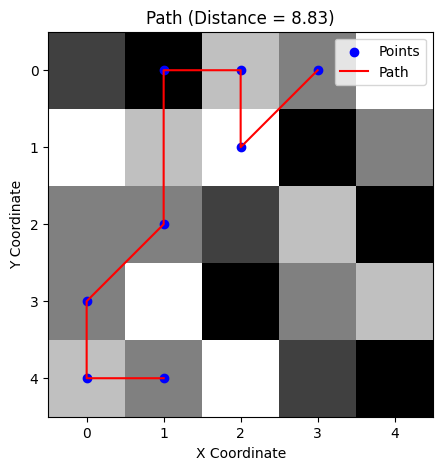

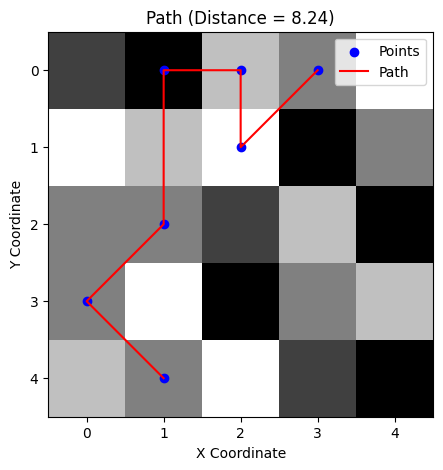

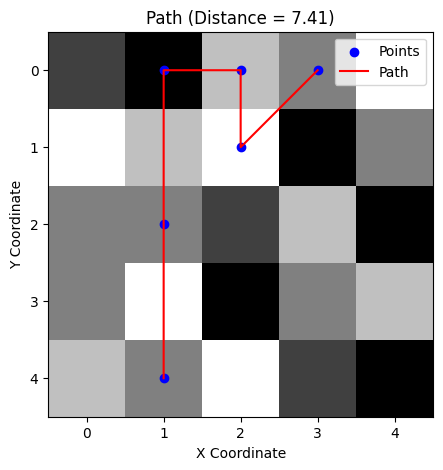

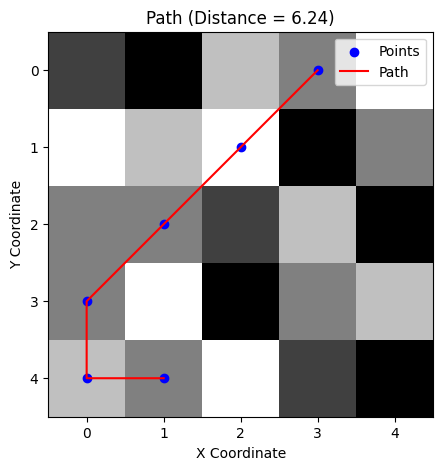

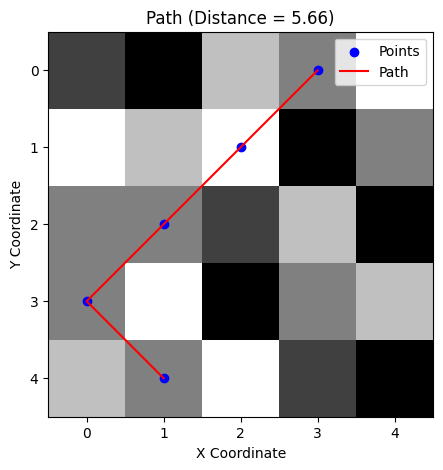

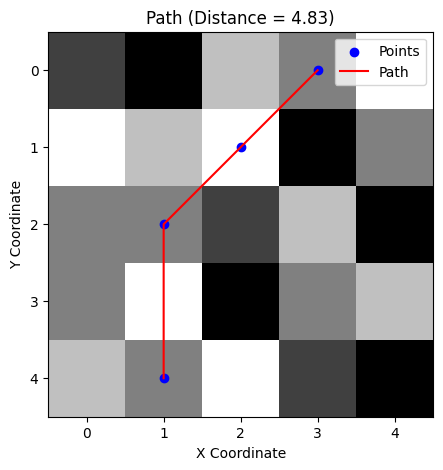

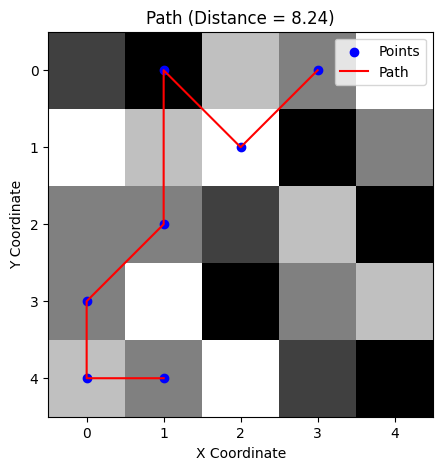

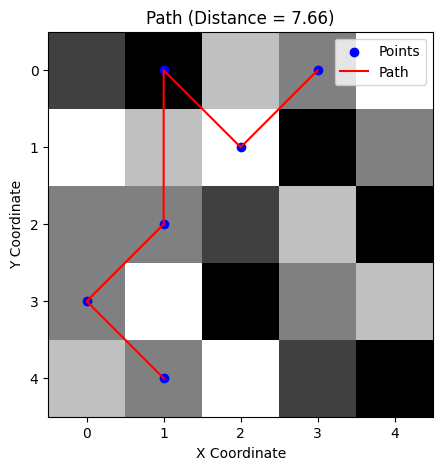

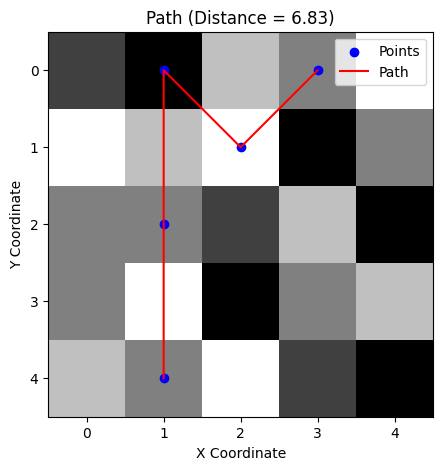

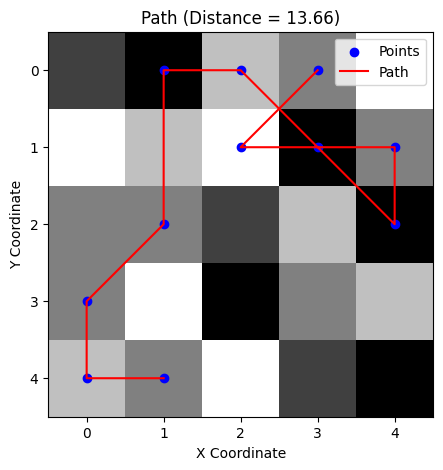

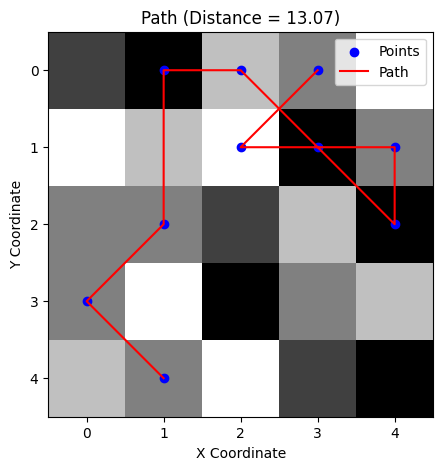

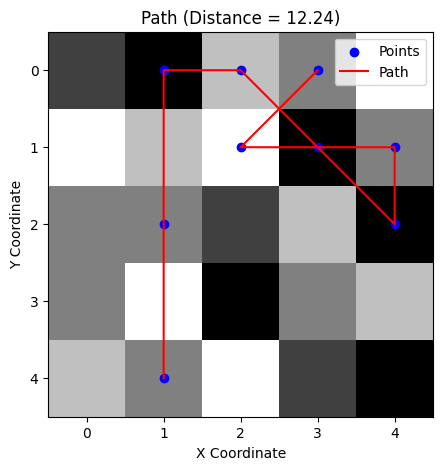

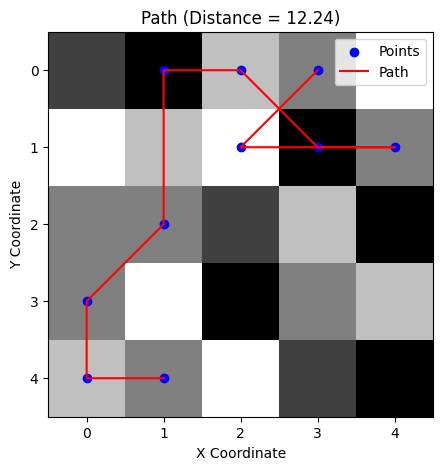

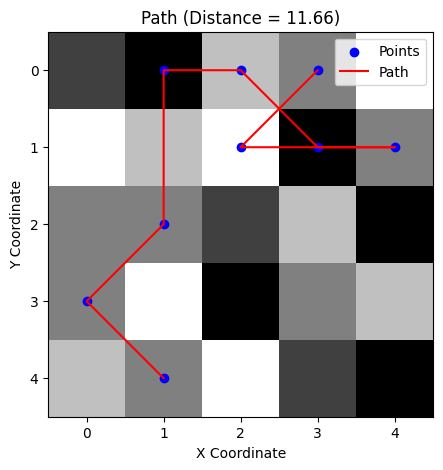

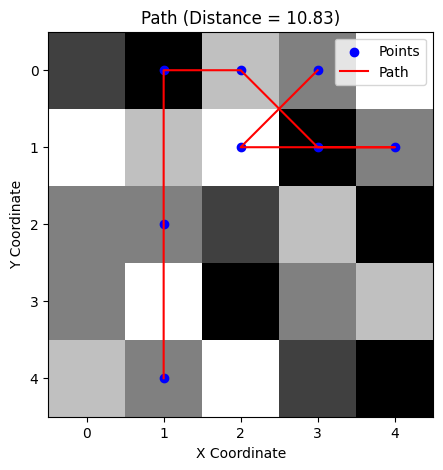

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path(coords):
    x_coords = [coord[0] for coord in coords]
    y_coords = [coord[1] for coord in coords]

    fig, ax = plt.subplots(figsize=(5, 5))

    # Set the background color to grey
    ax.set_facecolor('#f2f2f2')

    # Create a scatter plot of the coordinates
    ax.scatter(x_coords, y_coords, color='blue', label='Points')

    # Plot the path using a custom color and label
    ax.plot(x_coords, y_coords, color='red', label='Path')

    # Calculate the distance of the path
    dist = 0
    for i in range(len(coords)-1):
        dist += np.sqrt((coords[i+1][0]-coords[i][0])**2 + (coords[i+1][1]-coords[i][1])**2)

    # Add the distance to the title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Path (Distance = {dist:.2f})')
    ax.legend()

    plt.imshow(I, cmap='gray')



for i, coords in enumerate(graph):
    plot_path(coords)


### To plot the shortest path and distance

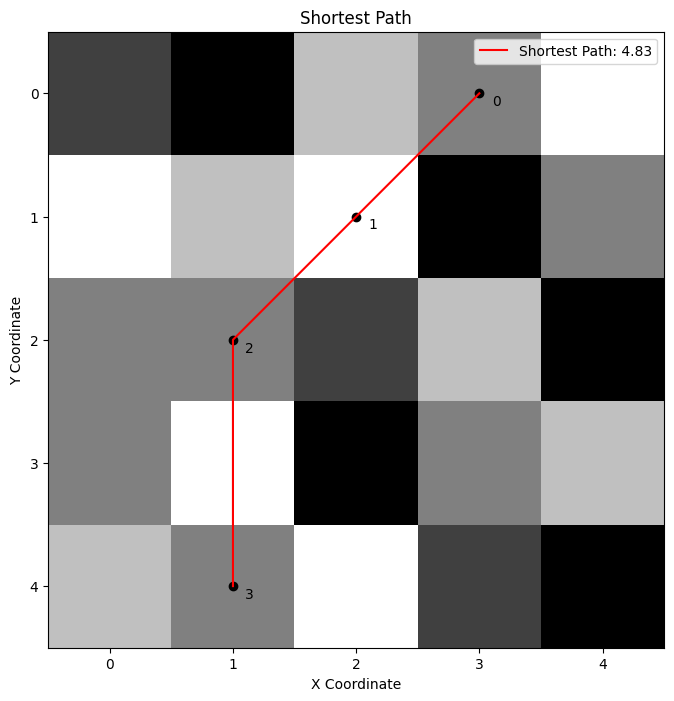

In [ ]:
import math
import matplotlib.pyplot as plt

# Define a function to calculate the distance of a path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path)-1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        total_distance += distance
    return total_distance

# Find the shortest path
shortest_path = None
shortest_distance = float('inf')
for path in graph:
    distance = calculate_distance(path)
    if distance < shortest_distance:
        shortest_path = path
        shortest_distance = distance

# Plot the shortest path
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_facecolor('lightgrey')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Shortest Path')

# Plot the points
for i, point in enumerate(shortest_path):
    x, y = point
    ax.scatter(x, y, color='black')
    ax.annotate(f'{i}', (x+0.1, y+0.1))

# Plot the path
x_coords = [point[0] for point in shortest_path]
y_coords = [point[1] for point in shortest_path]
ax.plot(x_coords, y_coords, color='red', label=f'Shortest Path: {shortest_distance:.2f}')
ax.legend()

plt.imshow(I, cmap='gray')


Shortest m path is shown above with distance 4.83 